<a href="https://colab.research.google.com/github/LAGISHETTYNANDITHA/Data-analysis-using-python/blob/main/daup_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/dermatology_database_1.csv')
print(df.head())



   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1         

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.mean(), inplace=True)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy}")

Accuracy of the SVM model: 0.9594594594594594


In [6]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy}")

Accuracy of the Random Forest model: 0.9864864864864865


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Calculate Z-scores for outlier detection
from scipy import stats
z = stats.zscore(df.iloc[:, :-1])
abs_z = abs(z)
filtered_entries = (abs_z < 3).all(axis=1)
df_filtered = df[filtered_entries]

# Now fill NaN values after removing outliers
df_filtered.fillna(df_filtered.mean(), inplace=True)


X = df_filtered.iloc[:, :-1]
y = df_filtered.iloc[:, -1]


svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model after outlier removal: {accuracy}")

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model after outlier removal: {accuracy}")

<ipython-input-7-5695a43a9c53>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(df_filtered.mean(), inplace=True)


Accuracy of the SVM model after outlier removal: 0.9594594594594594
Accuracy of the Random Forest model after outlier removal: 0.9864864864864865


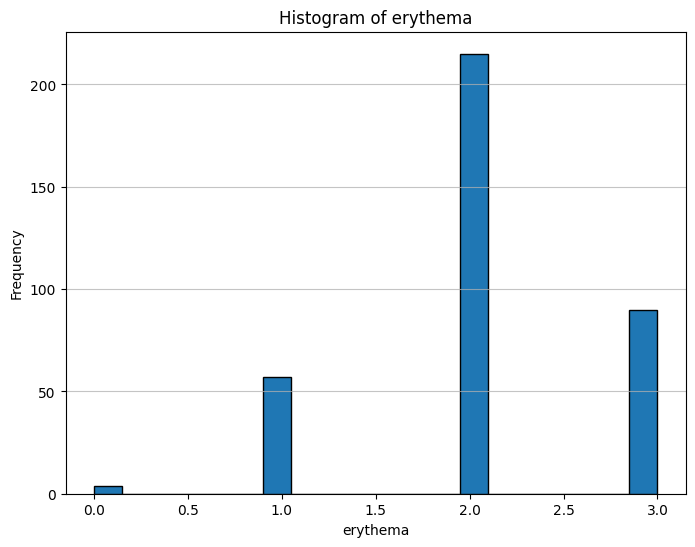

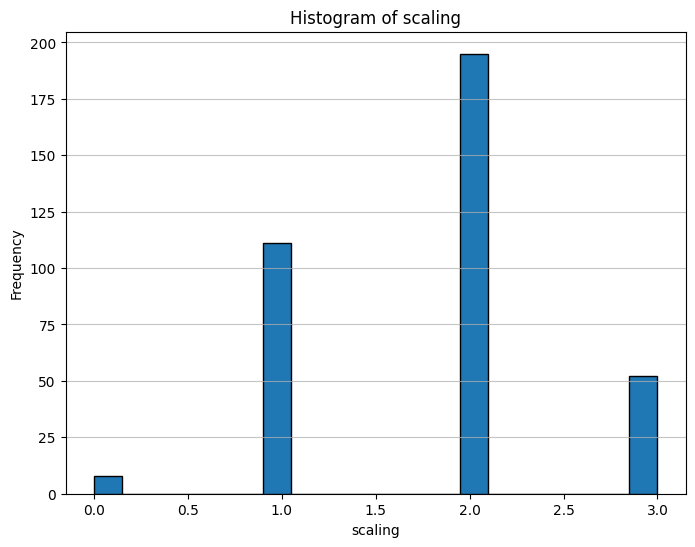

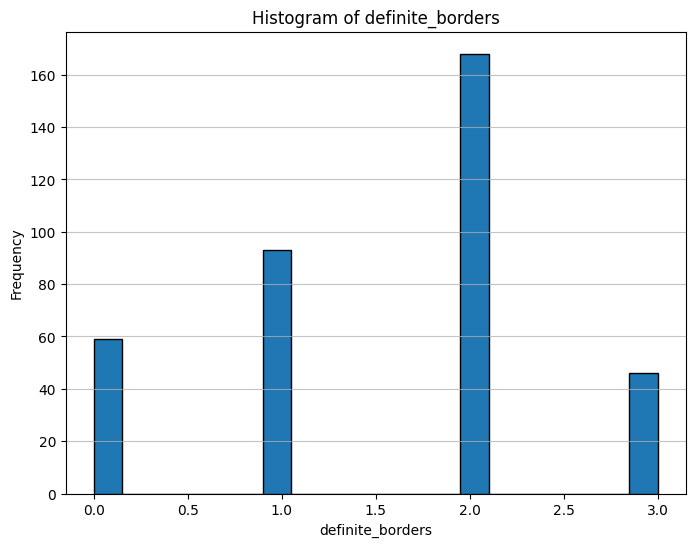

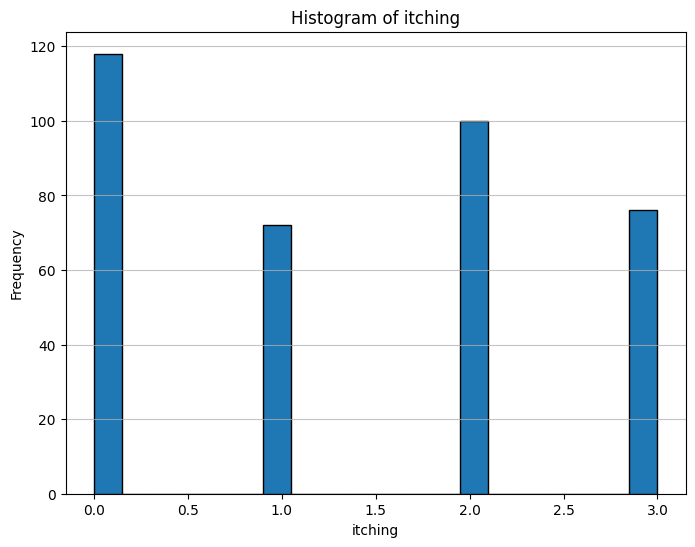

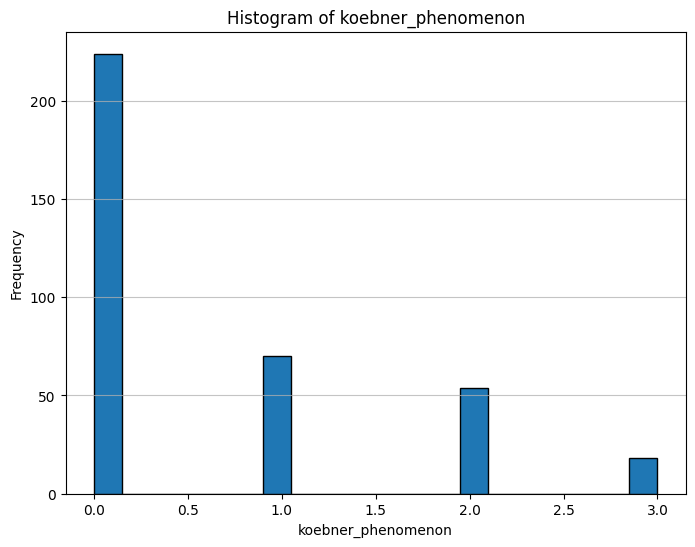

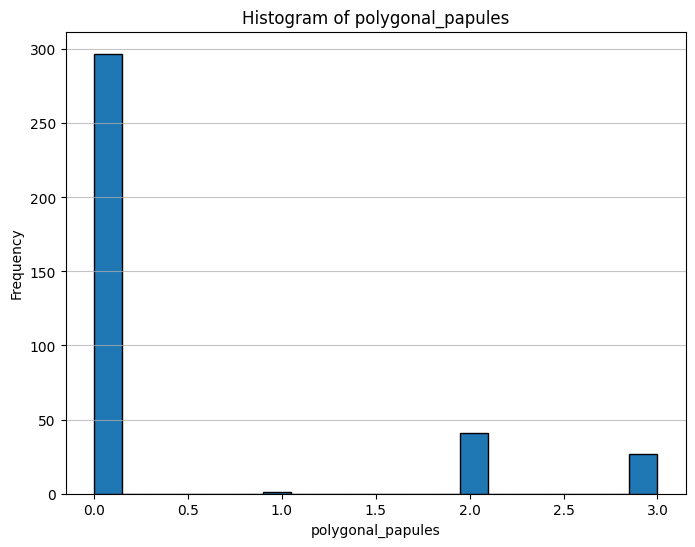

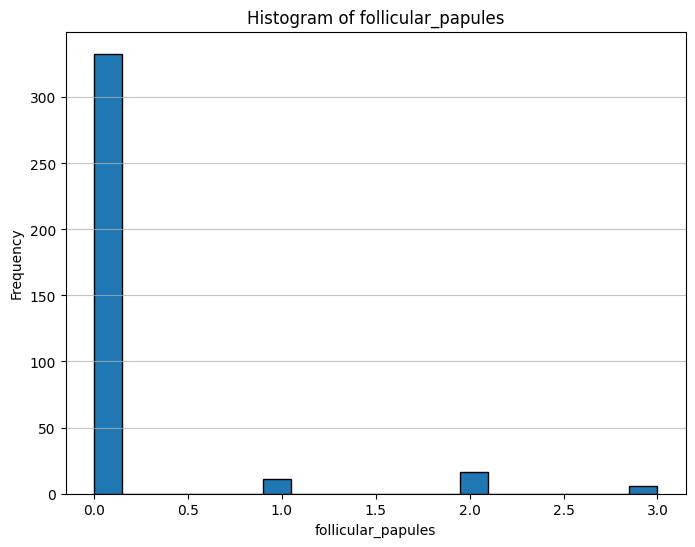

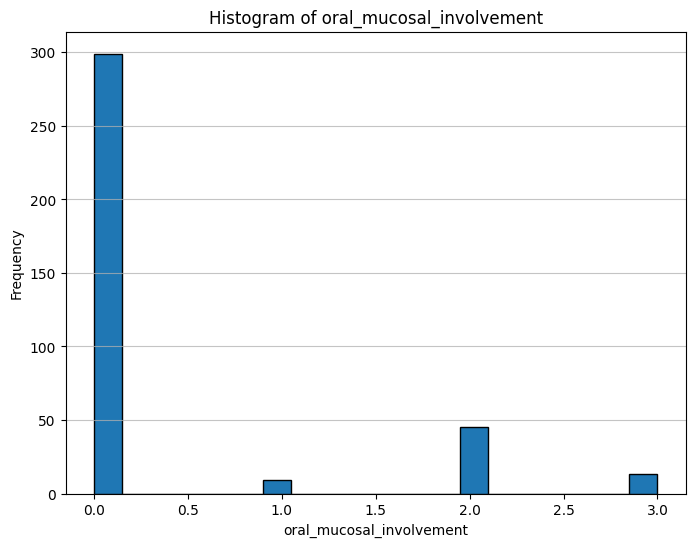

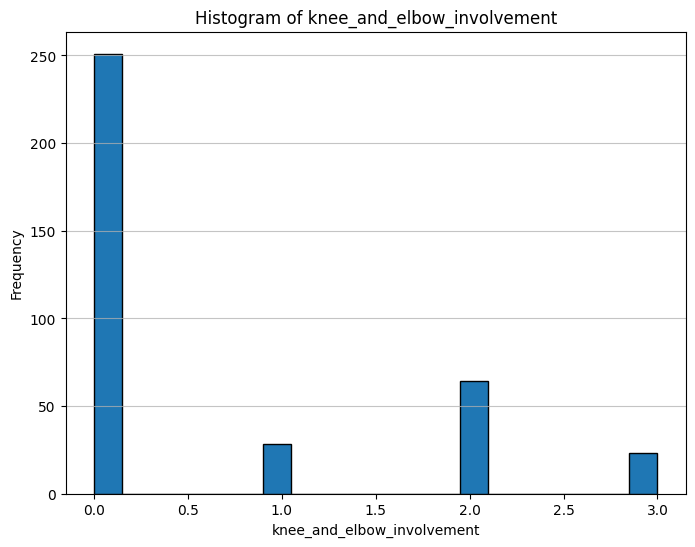

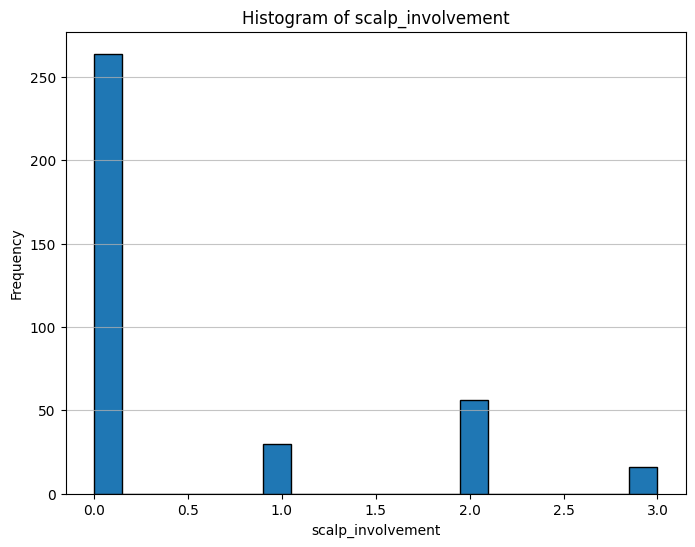

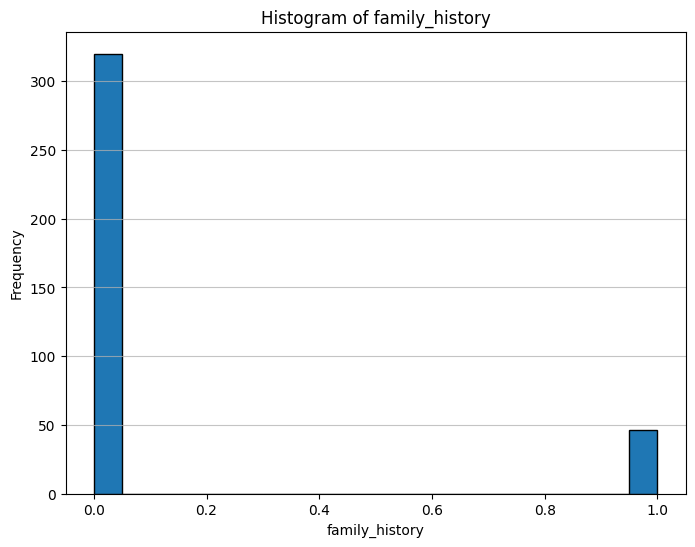

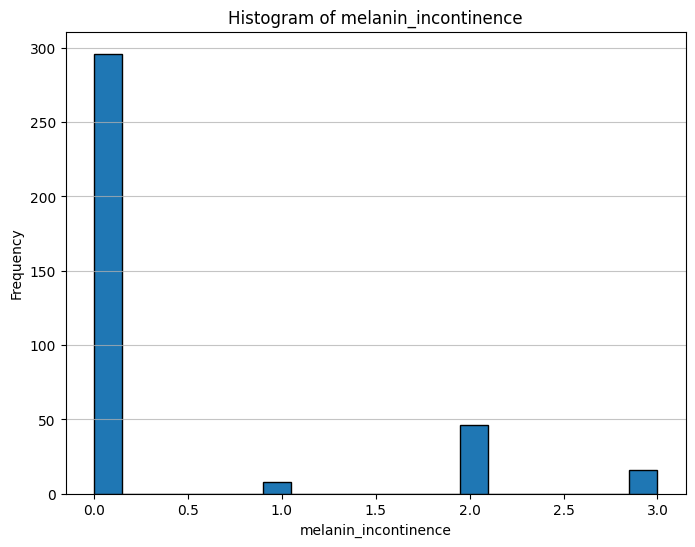

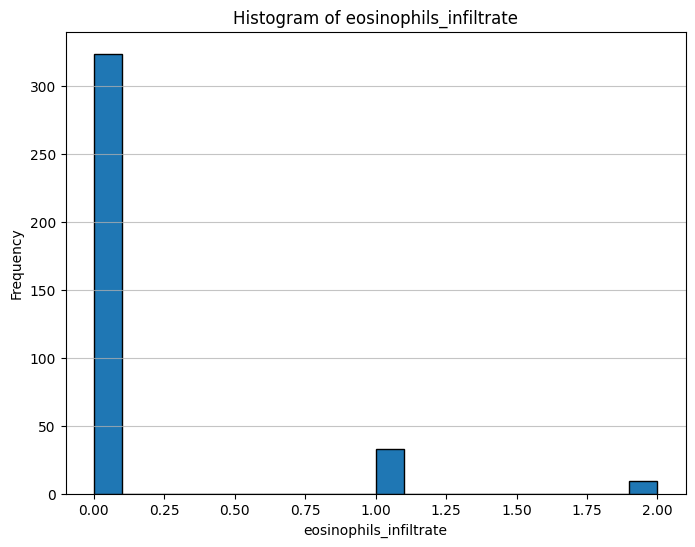

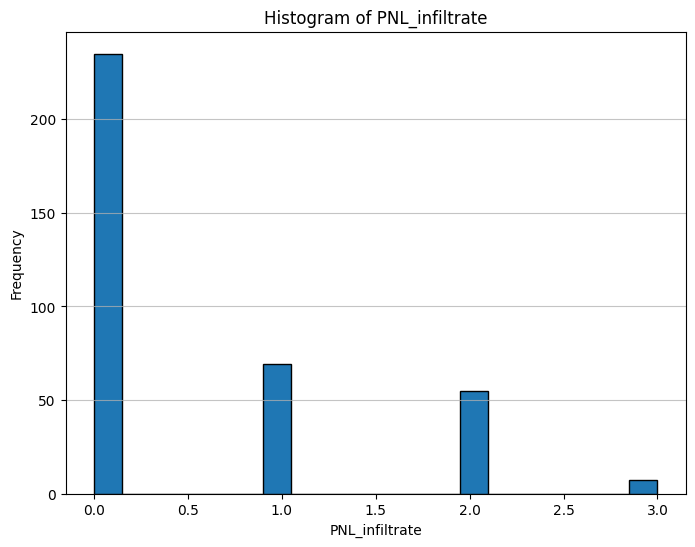

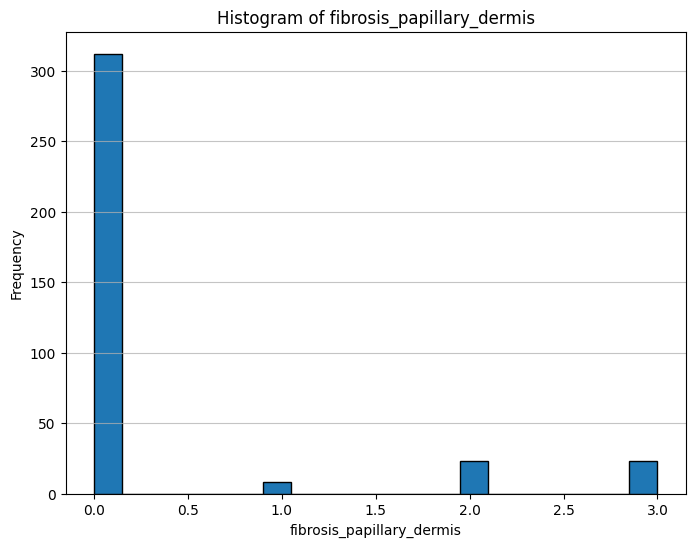

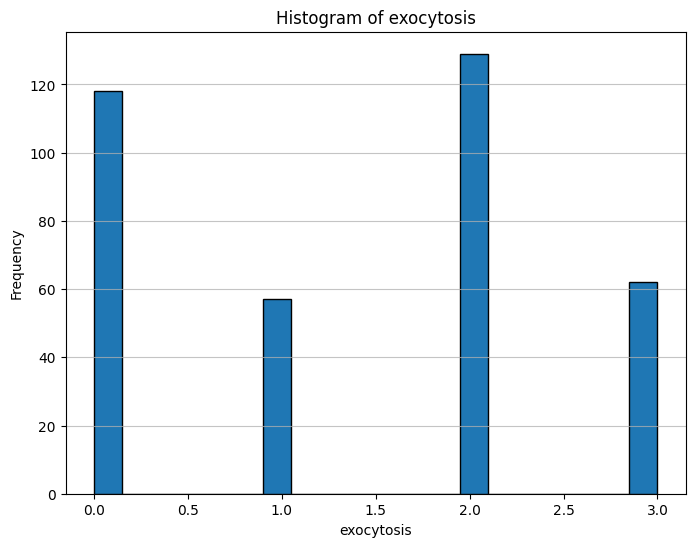

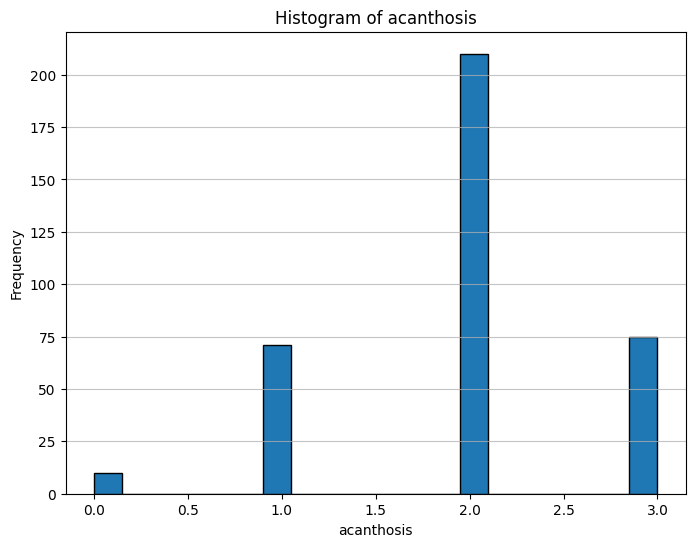

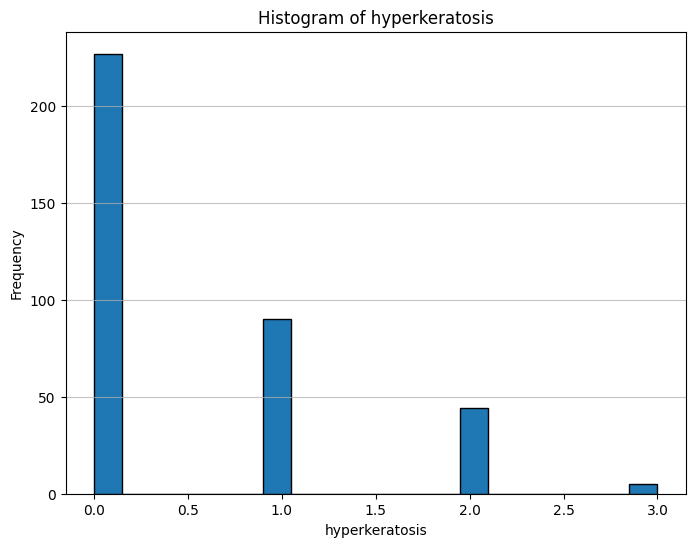

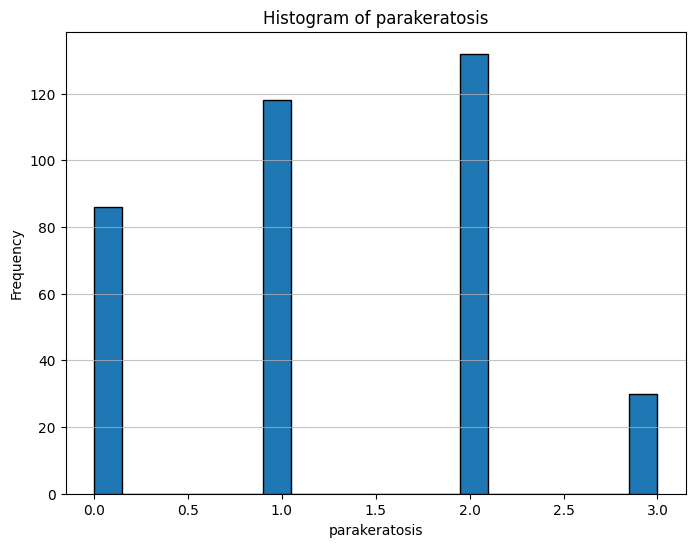

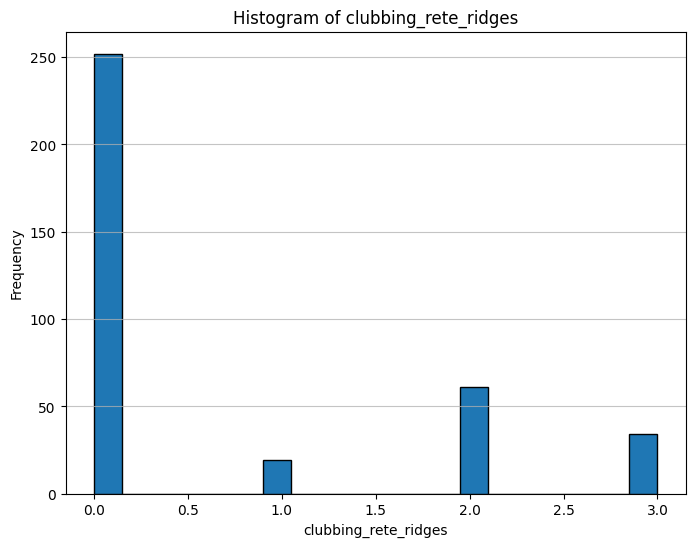

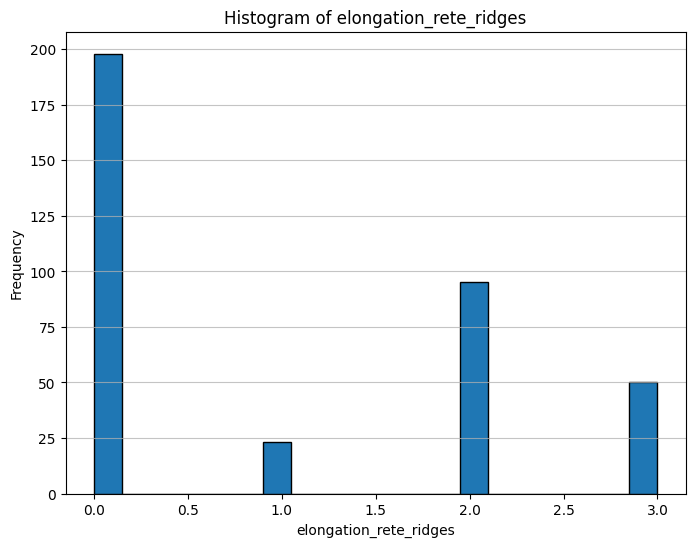

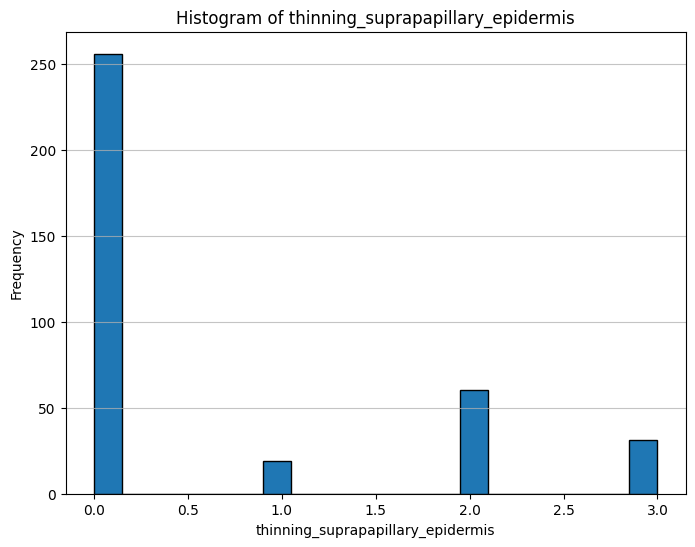

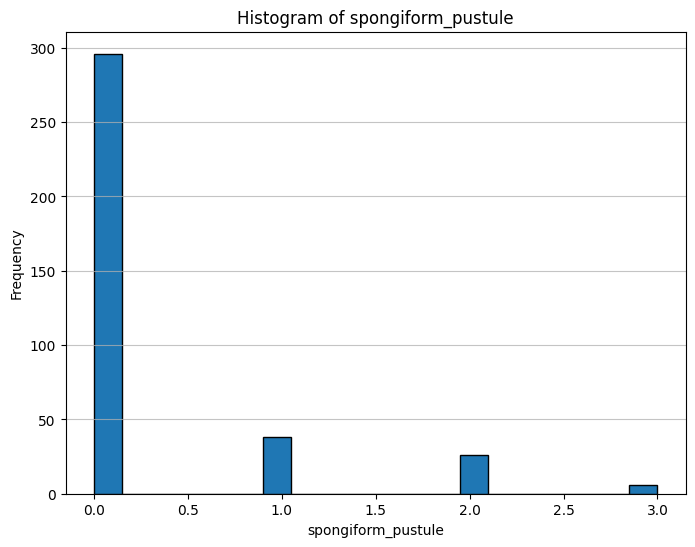

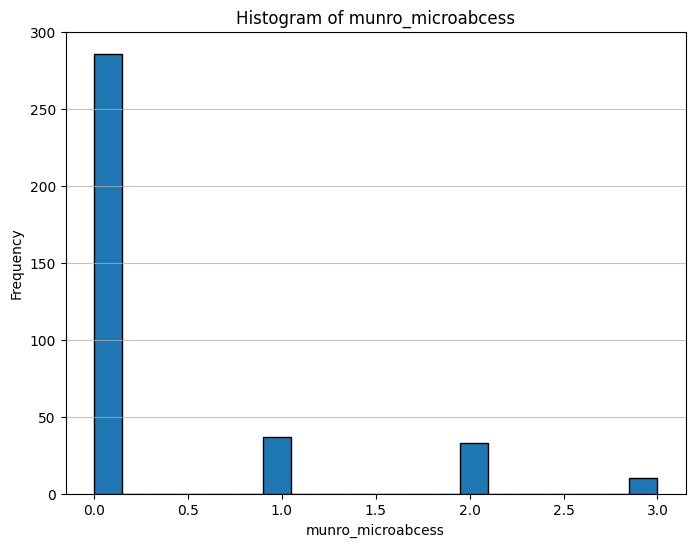

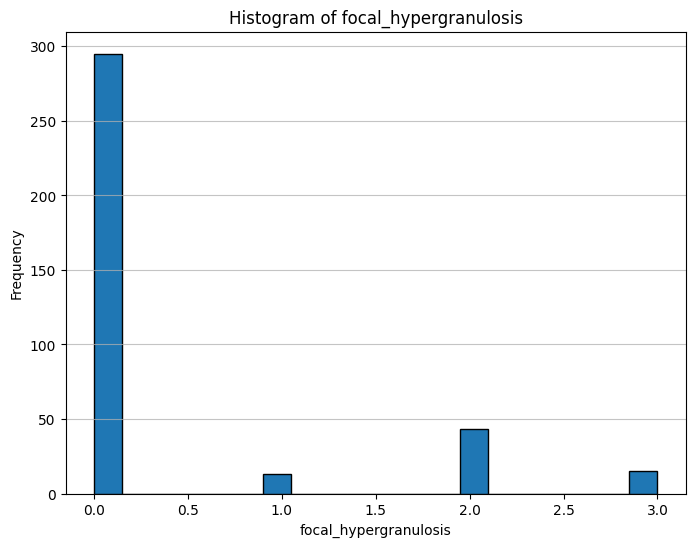

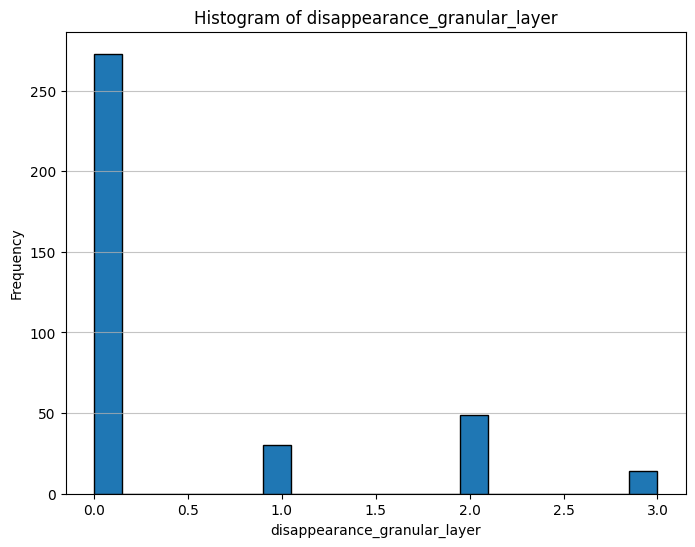

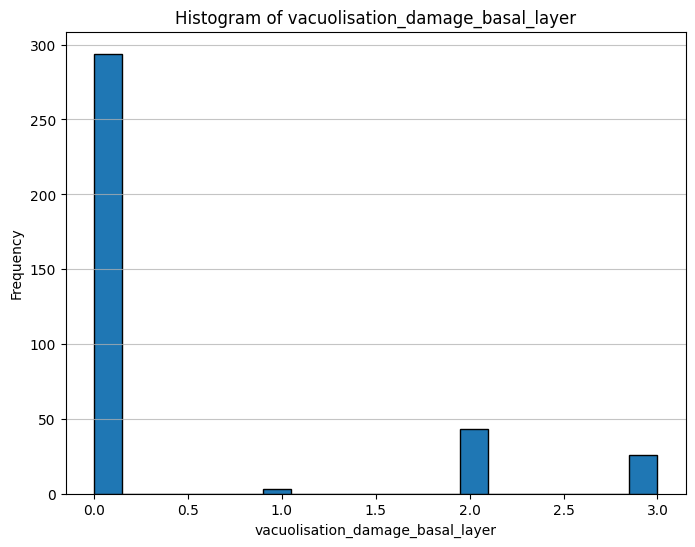

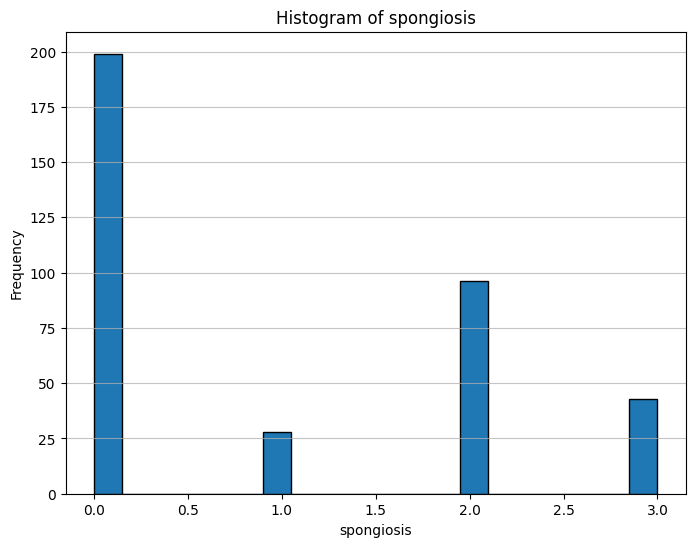

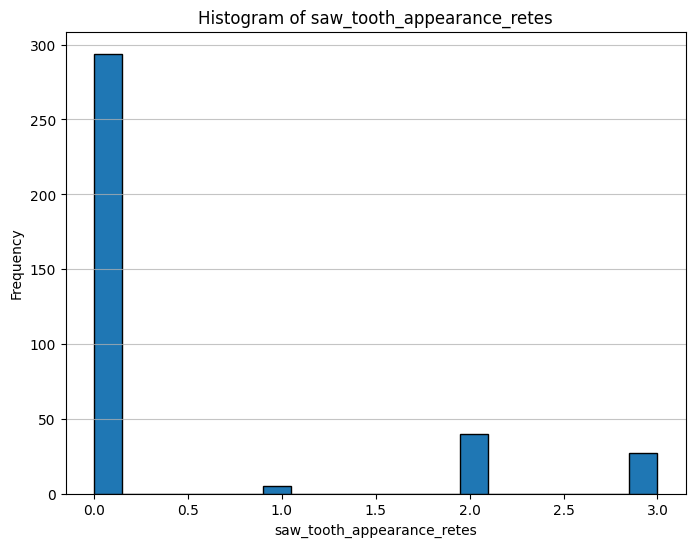

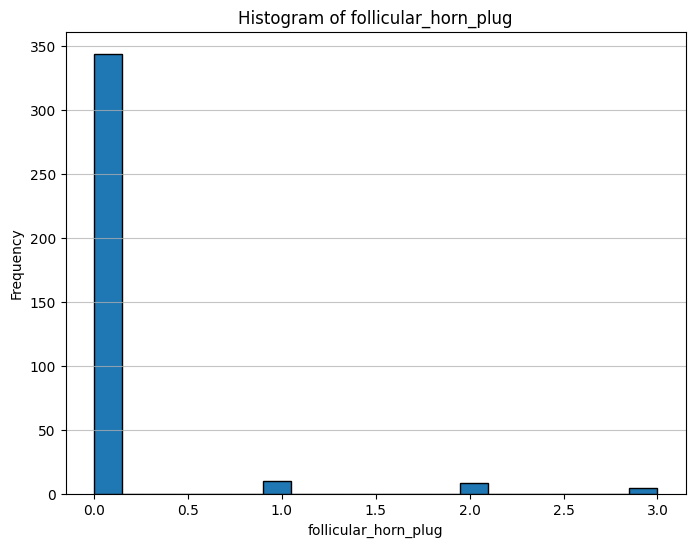

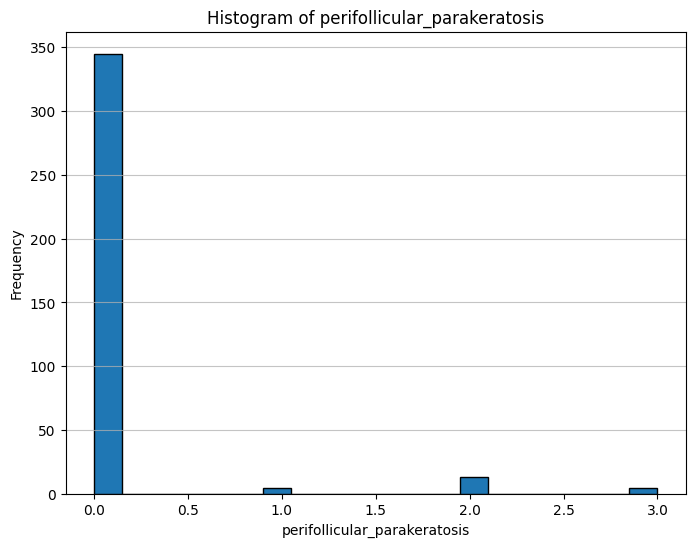

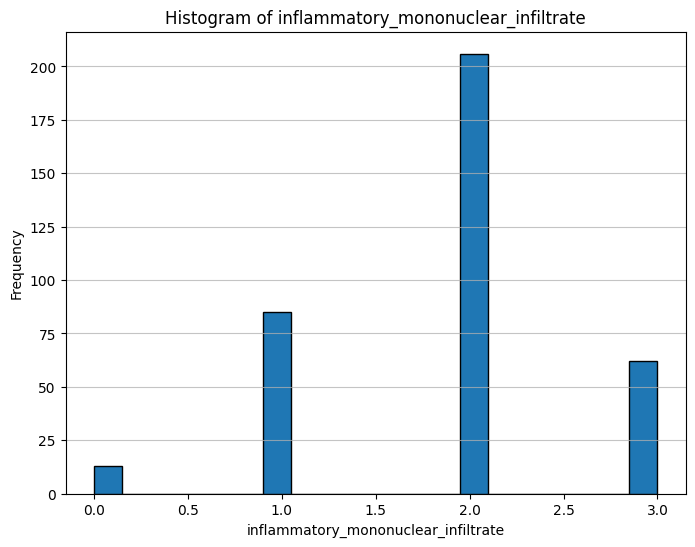

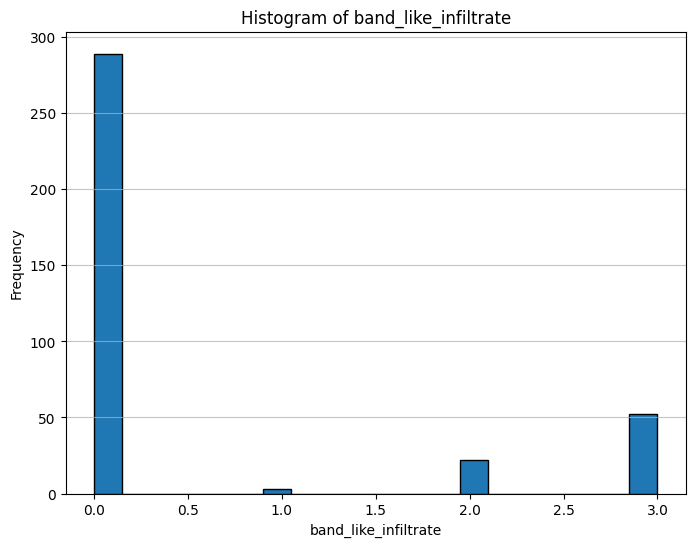

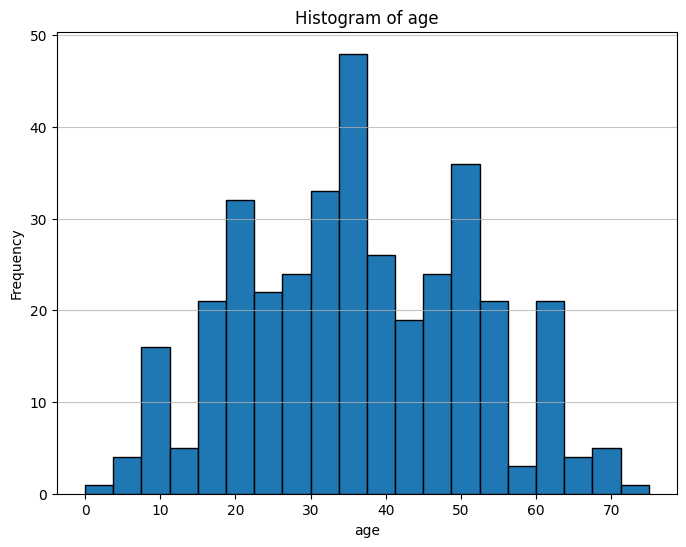

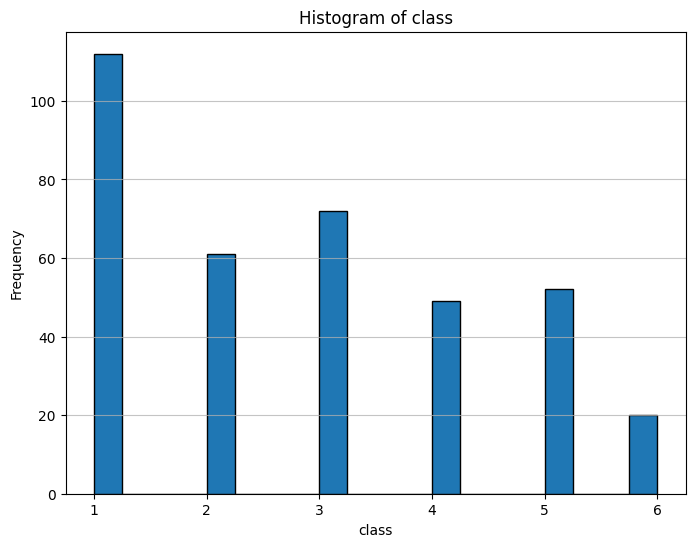

In [9]:

import matplotlib.pyplot as plt
from scipy import stats

# Plot histograms for each column
for col in df.columns:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  plt.hist(df[col], bins=20, edgecolor='black') # Use more bins for better visualization
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {col}')
  plt.grid(axis='y', alpha=0.75)
  plt.show()


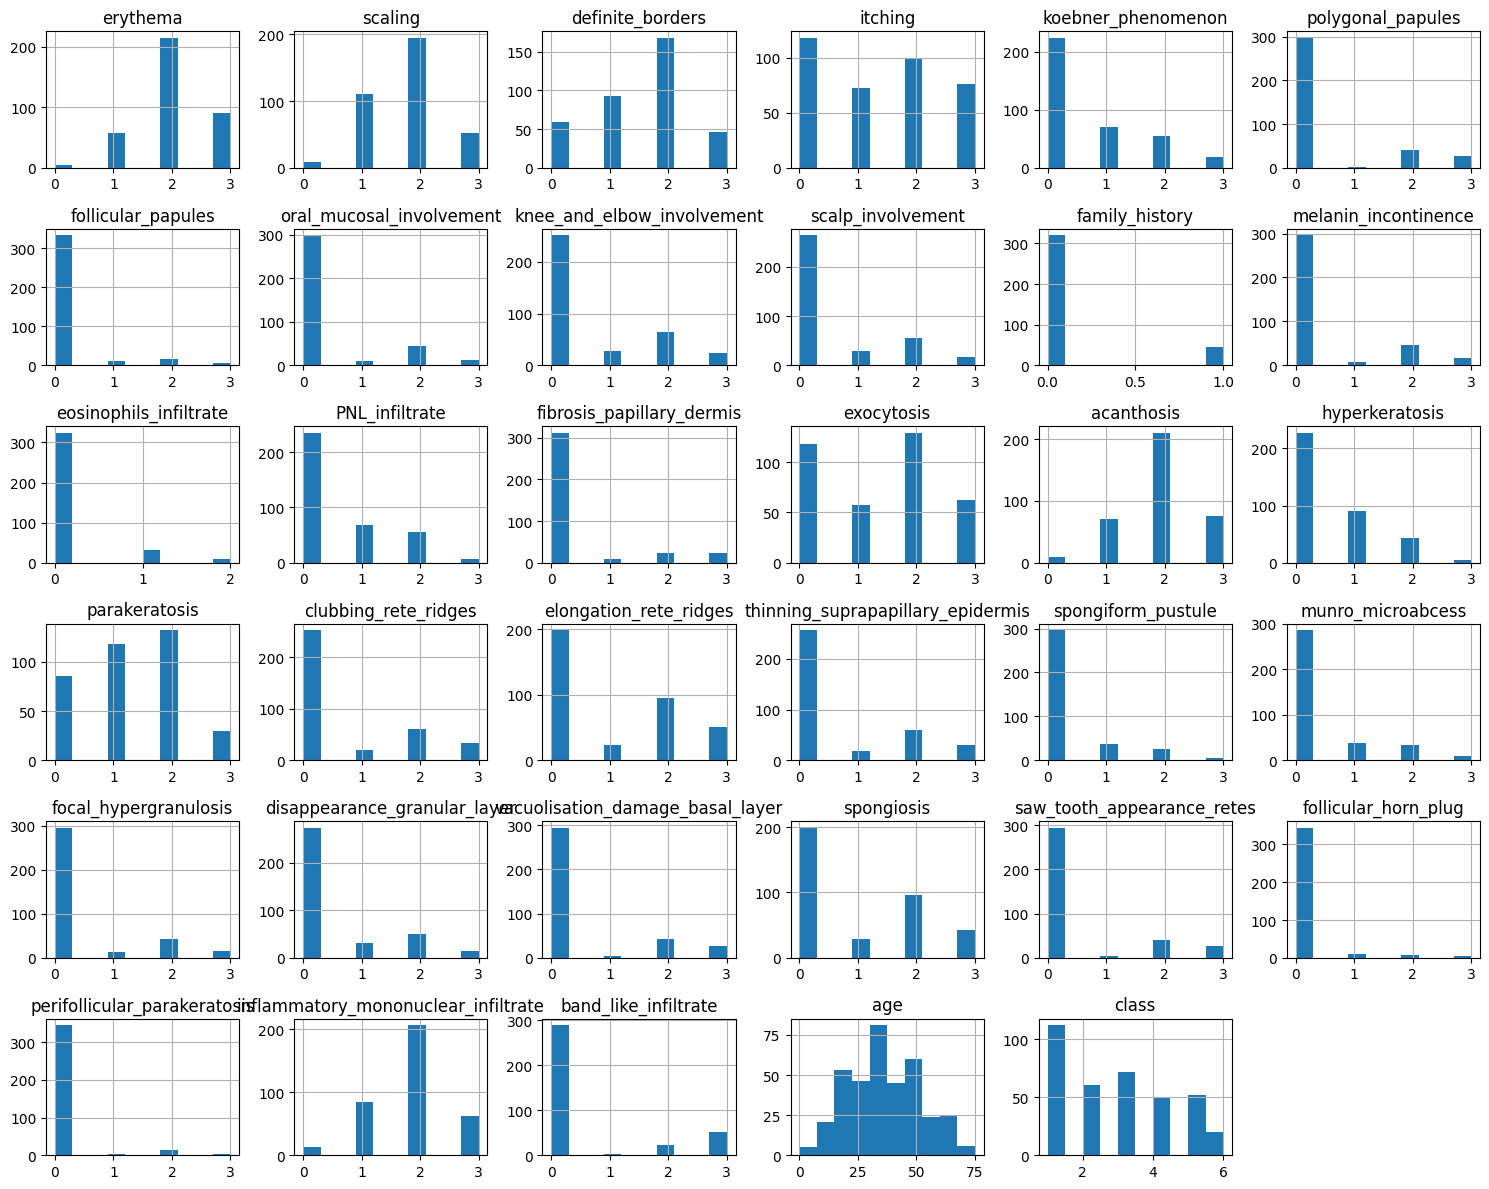

In [11]:
import matplotlib.pyplot as plt

# Assuming data is a pandas DataFrame
df.hist(figsize=(15, 12))

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Rotate x-axis labels if they are too long
plt.xticks(rotation=45, ha='right')

plt.show()